Entrer nom, prenom et groupe ici

# TP6 : Maximum de vraisemblance via l'algorithme de montée de gradient

In [1]:
# Chargement des librairies
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## Problème 1##

On considère les données $X_j=(X_{j1},X_{j2})\mapsto Y_j$, pour $j\in\{1,2,3,4\}$, avec :

$X_1=(2,0)$, $X_2=(3,2)$, $X_3=(0,3)$. $X_3=(3,4)$, et

$Y_1=0$, $Y_2=0$, $Y_3=1$, $Y_4=1$.

Ces données sont représentées ci-dessous.

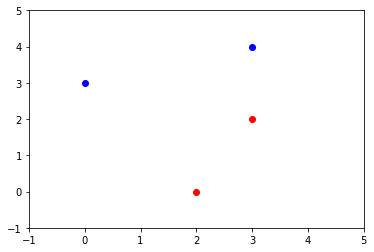

In [54]:
# Définition des données

X=np.array([[2,0],[3,2],[0,3],[3,4]])
Y=np.array([0,0,1,1])

#Représentation graphique des données

#Fenêtre :
plt.axis([-1,5,-1,5]) #xmin,xmax,ymin,ymax

# Nuage :
# - on utilise X[condition,0] pour obtenir la liste des premières coordonéés de X satisfaisant la condition
# - on utilise X[condition,1] pour obtenir la liste des secondes coordonéés de X satisfaisant la condition
plt.plot(X[(Y==0),0],X[(Y==0),1],'o',c='red')
plt.plot(X[(Y==1),0],X[(Y==1),1],'o',c='blue')

Dans la suite, on va chercher des coefficients $b$ et $W=\begin{pmatrix}w_1\\w_2\end{pmatrix}$ maximisant la vraisemblance de la loi de probabilité définie par $$\Pr(Y=1|X)=\sigma(b+w_1x_1+w_2x_2).$$
où $\sigma$ est la fonction sigmoïde, définie pour tout $x$ dans $R$ par $$\sigma(x)=\frac{1}{1+e^{-x}}.$$

La vraisemblance de cette loi est donnée par 
$$L(b,W)=\prod\limits_{j:Y_j=1}\sigma(b+w_1x_{j1}+w_2x_{j2})\times\prod\limits_{j:Y_j=0}(1-\sigma(b+w_1x_{j1}+w_2x_{j2}))$$

On rappelle (vu en cours) que $\sigma(x)\simeq 1$ dès que $x>>0$ ($x$ très supérieur à $0$), et $\sigma(x)\simeq 0$ dès que $x<<0$ ($x$ très inférieur à $0$).

La vraisemblance est donc grande si les coefficients $b$, $w_1$ et $w_2$ vérifient pour tout $j\in\{1,2,3,4\}$ :

$$(C_j):\left\{\begin{array}{l}b+w_1x_{j1}+w_2x_{j2}>>0\text{ si }Y_j=1\\b+w_1x_{j1}+w_2x_{j2}<<0\text{ si }Y_j=0\end{array}\right.$$


**Exercice 2**

Ecrire les 4 conditions $(C_j)$ que doivent satisfaire $b$, $w_1$ et $w_2$ :

Condition (C1) issue de la donnée X1,Y1 :
...
Condition (C2) issue de la donnée X2,Y2 :
...
Condition (C3) issue de la donnée X3,Y3 :
...
Condition (C4) issue de la donnée X4,Y4 :
...

**Exercice 3**

1) Proposer une valeur pour $b$, $w_1$, $w_2$ satisfaisant les 4 conditions précédentes :



Réponse :
b=....
w1=....
w2=....

2) Compléter la deuxième cellule ci-dessous afin de compléter le graphique généré avec les courbes de niveaux de la fonctionn $\sigma(b+w_1x_1+w_2x_2)$ ainsi trouvée

In [4]:
def sigma(x):
    return 1/(1+np.exp(-x))

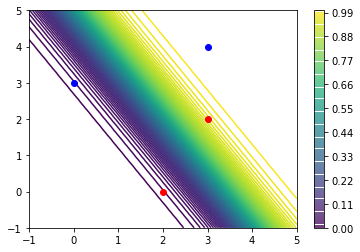

In [55]:
# Courbes de niveau de la fonction sigma(b+w1x1+w2x2)

# Calcul du tableau de valeurs (changer b, w1, w2 avec les bonnes valeurs)
x1list=np.linspace(-1,5,50)
x2list=np.linspace(-1,5,50)
sigmalist=[[sigma(-10+3*x1+2*x2) for x1 in x1list] for x2 in x2list]

# Dessin des courbes de niveau
plt.contour(x1list,x2list,sigmalist,100) # dessine 100 courbes de niveau de sigma(b+w1x1+w2x2)
plt.colorbar()

# Nuage de points
plt.axis([-1,5,-1,5])
plt.plot(X[(Y==0),0],X[(Y==0),1],'o',c='red')
plt.plot(X[(Y==1),0],X[(Y==1),1],'o',c='blue')

Dans la suite, on va déterminer une fonction $b+W\cdot X$ séparant les données à l'aide d'un algorithme de *montée* de gradient.
En effet, une telle fonction rend la log vraisemblance *grande*, et donc il s'agit de *maximiser* la log vraisemblance.

Pour cet algorithme, à chaque itération on calcule :
- $b[i+1]=b[i]+\tau\times\frac{\partial \ln(L(b,W))}{\partial b}$
- $w_1[i+1]=w_1[i]+\tau\times\frac{\partial \ln(L(b,W))}{\partial w_1}$
- $w_2[i+1]=w_2[i]+\tau\times\frac{\partial \ln(L(b,W))}{\partial w_2}$

À cette fin, on a besoin des dérivées de la log vraisemblance, données par (cf cours) :
- $\frac{\partial \ln(L(b,W))}{\partial b}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)$
- $\frac{\partial \ln(L(b,W))}{\partial w_1}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)x_{j1}$
- $\frac{\partial \ln(L(b,W)}{\partial w_2}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)x_{j2}$


Les deux cellules ci-dessous définisse les fonctions :
- `gradlnL(b,w1,w2)`, qui renvoit le gradient de la log-vraisemblance calculée en (b,w1,w2), ains
- `montee(b,w1,w2,tau,tolerance,nbiterationsmax)`, qui effectue l'algorithme de montee de gradient et renvoit la liste `[b[i],w1[i],w2[i]]` des coefficients atteints par l'algorithme

In [45]:
# Fonction renvoyant le gradient de la log vraisemblance associée à b,w1,w2
def gradlnL(b,w1,w2):
    return [np.sum([Y[j]-sigma(b+w1*X[j][0]+w2*X[j][1]) for j in range(len(X))]),
            np.sum([(Y[j]-sigma(b+w1*X[j][0]+w2*X[j][1]))*X[j][0] for j in range(len(X))]),
            np.sum([(Y[j]-sigma(b+w1*X[j][0]+w2*X[j][1]))*X[j][1] for j in range(len(X))])
           ] 

In [46]:
# Algorithme de montee de gradient initialisé
def montee(b,w1,w2,tau=0.01,tolerance=1e-6,nbiterationsmax=1000):
    diverge=False
    L=[]
    for i in range(nbiterationsmax):
        g = gradlnL(b,w1,w2)
        try: # traitement des erreurs si l'algorithme diverge
            L.append([b,w1,w2])
            if g[0]**2+g[1]**2+g[2]**2<tolerance:
                print('L\'algorithme a convergé en',i,'itérations. \nSolution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
                L.append([b,w1,w2])
                return L
            b=b+tau*g[0]
            w1=w1+tau*g[1]
            w2=w2+tau*g[2]
        except OverflowError as err: # traitement de l'erreur "overflow"
            print('L\'algorithme a divergé.\n Solution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
            diverge=True
            break
    if (diverge==False):        
        print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
    return L

### Exercice

La cellule ci-dessous permet d'effectuer l'algorithme, puis de représenter les droites d'équation `b[i]+w1[i]*x1+w2[i]*x2=0` atteintes par l'algorithme. L'algorithme converge si le gradient de la log-vraisemblance atteint est suffisamment petit (inférieur à `tolerance`).

1. Effectuer l'algorithme initialisé à la droite d'équation $x_2=1$ (déterminer les $b$, $w_1$ et $w_2$ associés), avec un pas $\tau=0.1$, une tolérance de $0.1$ et un nombre d'itérations maximum de 50 (vous devez obtenir une convergence en 23 itérations).
2. En utilisant la sortie texte de l'lagorithme, donner l'équation de la droite atteinte par l'algorithme. Cette droite sépare-t-elle linéairement les données ?


L'algorithme n'a pas convergé.
 Solution atteinte :
 b= 0.0 
 w1= 0.0 
 w2= 0.0 
Gradient : [0.0, -1.0, 2.5] 
Norme du gradient: 7.25


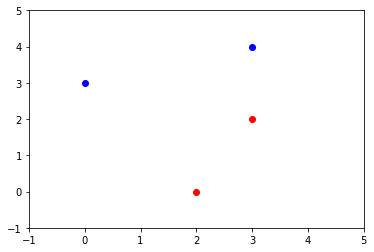

In [56]:
# Calculs de la suite des [b[i],w1[i],w2[i]] via l'algorithme
Coeffs=montee(0,0,0,0,0,50)

# Représentation graphique des droites b[i]+w1[i]*x1+w2[i]*x2
for i in range(len(Coeffs)):
    W=Coeffs[i]
    b=W[0]
    w1=W[1]
    w2=W[2]
    if (w2!=0):
        plt.plot([-1,5],[(-w1*(-1)-b)/w2,(-w1*5-b)/w2],c="black",alpha=0.1+0.9*i/(len(Coeffs)-1))
    elif (w1!=0):
        plt.plot([(-w2*(-1)-b)/w1,(-w2*5-b)/w1],[-1,5],c="black",alpha=0.1+0.9*i/(len(Coeffs)-1))        
    # alpha est un paramètre de transparence variant ici de 0.1 à 0.9 avec la valeur de i

# Représentation du nuage de points
plt.axis([-1,5,-1,5])
plt.plot(X[(Y==0),0],X[(Y==0),1],'o',c='red')
plt.plot(X[(Y==1),0],X[(Y==1),1],'o',c='blue')

# Problème 2 #

À vous de généraliser les calculs précédents avec un nuage de 40 données

In [50]:
# Cette cellule n'est à exécuter qu'une fois, afin de générer des données aléatoires,
# et afin de les recopier dans la cellule suivante

# Création aléatoire des données :
# on génère 40 données (Xj,Yj), avec Xj=(xj1,xj2), Y=0 ou 1
# données centrées autour de 2 centres
X, Y = make_blobs(n_samples=40, centers=[[-0.5,-0.5],[0.5,0.5]], n_features=2, cluster_std=0.5,center_box=(-1,1))
print('Liste des [Xj1,Xj2] (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(X,separator=',',max_line_width=10000).replace('\n', ''))
print('\nListe des Yj (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(Y,separator=',',max_line_width=10000).replace('\n', ''))

Liste des [Xj1,Xj2] (à copier coller dans la cellule ci-dessous): 

 [[-0.19585225,-1.3271283 ], [ 0.92310067, 0.63463971], [-0.14517691,-0.07183017], [-0.26913728,-0.11132508], [ 0.1416906 ,-0.70154721], [-0.38509077, 1.40957263], [ 0.21237817, 0.90371688], [ 0.6304816 , 0.71594216], [-0.99725977,-0.83021266], [ 0.18028047, 0.93609234], [ 1.25709344, 0.93202983], [-0.80283172,-1.18099021], [ 1.20208294, 1.05314607], [-0.89306078,-1.88526537], [ 0.93752113,-0.2402055 ], [ 0.65203608, 0.00788877], [ 0.0995634 , 0.02635068], [-0.67604692, 0.79110615], [ 0.19109478,-0.57539184], [ 0.6962618 , 0.8689253 ], [-0.60592776,-0.16200296], [-0.65977578,-0.80985583], [ 0.71778128, 0.20302839], [-0.69453339,-0.84422414], [-1.0158622 ,-0.22137742], [-0.91281103,-0.5431826 ], [-0.36916092,-1.55293666], [ 0.47668486,-0.53312233], [-0.8598797 ,-0.04025167], [ 0.09726989,-0.2529091 ], [-1.52123973,-1.70213227], [-1.25688532,-0.62532461], [-0.32147551,-0.50224855], [-0.90334953, 0.63665443], [ 1.52270076

In [57]:
# Modifier en copiant collant avec les données générées aléatoirement ci-dessus
# attention à bien identifier les crochets fermant et ouvrant

X=np.array([[Copier la liste des X ici]]
)
Y=np.array([Copier la liste des Y ici])

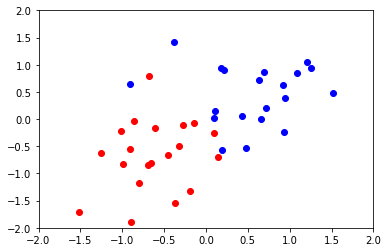

In [59]:
# Visualisation du nuage de points
# Attention à la fenêtre, qui est différente de celle du problème 1

plt.axis([-2,2,-2,2]) # (xmin,xmax,ymin,ymax)
plt.plot(X[(Y==0), 0], X[(Y==0), 1],'o',c='red') # en rouge les points (Xj1,Xj2) tels que Y=0
plt.plot(X[(Y==1), 0], X[(Y==1), 1],'o',c='blue') # en bleu les points (Xj1,Xj2) tels que Y=1

### Exercice

1. Utiliser la cellule ci-dessous pour déterminer une droite séparant au mieux les données à l'aide de l'algorithme de montée de gradient (algorithme convergent avec avec une tolerance à 0.1, 50 itérations max).
2. Déterminer une équation de la droite obtenue
3. Déterminer le nombre de faux positifs (tels que $\sigma(b+w_1x_{j1}+w_2x_{j2})>0$ alors que $Y_j=0$) et de faux négatifs (tels que $\sigma(b+w_1x_{j1}+w_2x_{j2})<0$ alors que $Y_j=1$) de la loi $\sigma(b+w_1x_1+w_2x_2)$ obtenue.

- Convergence en ... itérations

- Droite obtenu :

- Nombre de faux positifs :

- Nombre de faux négatifs :